In [178]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Loading csv type data of Hand Written Digits

In [179]:
X = np.loadtxt('train_X_1000.csv', delimiter = ',')
Y = np.loadtxt('train_label_1000_mx10.csv', delimiter = ',')
Yr = np.loadtxt('train_label_1000.csv', delimiter= ',')

X = X.T
Y = Y.T

# Visualizing images from dataset randomly

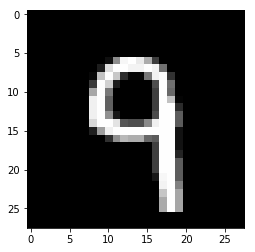

In [180]:
index = int(random.randrange(0,X.shape[1]))
plt.imshow(X[:, index].reshape((28,28)),cmap='gray')
plt.show()

# Sigmoid and initialization with zeros

In [228]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

In [229]:
w = np.zeros((10,784))
b = np.zeros((10,1))

# Cost Function

In [230]:
def compute_cost_reg(w,b,x, y, lambd):
    m = x.shape[1]
    z = np.dot(w, X) + b
    a = sigmoid(z)
    cost = -(1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a)) + (lambd/(2*m))*np.sum(np.square(w))
    dw =  (1/m)*np.dot((a-y), X.T) + (lambd/m)*w
    db = (1/m)*np.sum((a - y), axis = 1, keepdims = True) 
      
    return cost, dw, db

# Gradient

In [231]:
def grad(w, b, x, y, learning_rate, iterations, lambd):

    cost_list = []
    for i in range(iterations + 1):
        cost, dw, db = compute_cost_reg(w, b, x, y, lambd)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        cost_list.append(cost)
        
        if i%(iterations/5) == 0 :
            print("Cost after ", i ,"iterations is ", cost)
    
    return w, b, cost_list

# Model implementation

In [232]:
iter = 500
Wr, Br, Cost_list_reg = grad(w, b, X, Y, learning_rate = 0.000015, iterations = iter, lambd = 0.9)

Cost after  0 iterations is  6.931471805599453
Cost after  100 iterations is  0.6125786288540486
Cost after  200 iterations is  0.46056914584776104
Cost after  300 iterations is  0.3776777259794881
Cost after  400 iterations is  0.32306800054726686
Cost after  500 iterations is  0.28342695153400554


In [216]:
W, B, Cost_list = grad(w, b, X, Y, learning_rate = 0.000015, iterations = iter, lambd = 0)

Cost after  0 iterations is  6.931471805599453
Cost after  100 iterations is  0.6125775717649785
Cost after  200 iterations is  0.46056731913836263
Cost after  300 iterations is  0.3776751843789375
Cost after  400 iterations is  0.32306479043552316
Cost after  500 iterations is  0.28342311029898765


# Ploting Cost function v/s Iterations

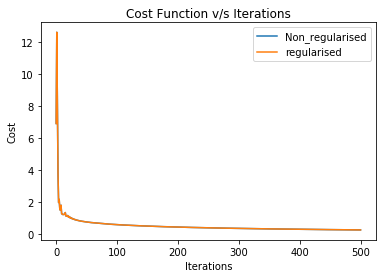

In [233]:
t = np.arange(0, iter+1)
plt.plot(t, Cost_list, label = 'Non_regularised')
plt.plot(t, Cost_list_reg, label = 'regularised')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function v/s Iterations')
plt.legend()
plt.show()

# For Training set

In [234]:
z_prob = np.dot(W, X) + B
a_prob = sigmoid(z_prob)
a_pred  = a_prob.max(0)
y_pred = []

for i in range(z_prob.shape[1]):
    for j in range(z_prob.shape[0]):
        if a_prob[j][i] == a_pred[i]:
            y_pred.append(j)

y_pred = np.array(y_pred)
Y_pred = np.reshape(y_pred, (z_prob.shape[1],1))

In [235]:
z_prob_r= np.dot(Wr, X) + Br
a_prob_r = sigmoid(z_prob_r)
a_pred_r  = a_prob_r.max(0)
y_pred_r = []

for i in range(z_prob_r.shape[1]):
    for j in range(z_prob_r.shape[0]):
        if a_prob_r[j][i] == a_pred_r[i]:
            y_pred_r.append(j)

y_pred_r = np.array(y_pred_r)
Y_pred_rr = np.reshape(y_pred_r, (z_prob_r.shape[1],1))

# Training Accuracy

In [236]:
accuracy = np.mean(Yr == Y_pred.T)*100
print("Our accuracy is %.2f" % accuracy, "%")

Our accuracy is 99.10 %


In [237]:
accuracy_rr = np.mean(Yr == Y_pred_rr.T)*100
print("Our regularized accuracy is %.2f" % accuracy_rr, "%")

Our regularized accuracy is 99.10 %


# For Test set

In [238]:
X_t = np.loadtxt('test_X_350.csv', delimiter = ',')
Y_t = np.loadtxt('test_label_350.csv', delimiter = ',')

X_t = X_t.T
Y_t = np.reshape(Y_t, (1,Y_t.shape[0]))

In [239]:
z_test_prob = np.dot(W, X_t) + B
a_test_prob = sigmoid(z_test_prob)
a_test_pred = a_test_prob.max(0)
y_test_pred = []

for i in range(z_test_prob.shape[1]):
    for j in range(z_test_prob.shape[0]):
        if a_test_prob[j][i] == a_test_pred[i]:
            y_test_pred.append(j)
            
y_test_pred = np.array(y_test_pred)
y_test_pred = np.reshape(y_test_pred, (z_test_prob.shape[1], 1))

In [240]:
z_test_prob_r = np.dot(Wr, X_t) + Br
a_test_prob_r = sigmoid(z_test_prob_r)
a_test_pred_r = a_test_prob_r.max(0)
y_test_pred_r = []

for i in range(z_test_prob_r.shape[1]):
    for j in range(z_test_prob_r.shape[0]):
        if a_test_prob_r[j][i] == a_test_pred_r[i]:
            y_test_pred_r.append(j)
            
y_test_pred_r = np.array(y_test_pred_r)
y_test_pred_rr = np.reshape(y_test_pred_r, (z_test_prob_r.shape[1], 1))

# Test Accuracy

In [244]:
accuracy = np.mean(y_test_pred == Y_t.T)*100
print("Our Test accuracy is %.2f" %accuracy, "%")

Our Test accuracy is 86.57 %


In [245]:
accuracy_r = np.mean(y_test_pred_r == Y_t.T)*100
print("Our Regularized Test accuracy is %.2f" %accuracy, "%")

Our Regularized Test accuracy is 86.57 %


# Lets visualize our Test set accuracy

AI (our algorithm says) : This is  [5]


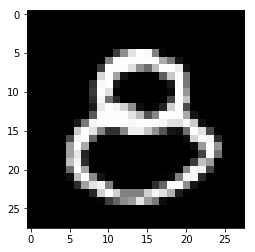

In [246]:
index = random.randrange(z_test_prob.shape[1])

plt.imshow(X_t[:,index].reshape(28,28), cmap = 'gray')
print("AI (our algorithm says) : This is ", y_test_pred[index,:])
plt.show()

# Accuracy History

    For learning_rate = .000015
 For iter = 50,   train = 92.40% , test = 87.40% 
 
 For iter = 500,  train = 99.10% , test = 88.00%
 
 For iter = 1000, train = 99.90% , test = 87.50%
 
    For learning_rate = 0.00002
 For iter = 1000, train = 99.90 , test = 87.30%

# Conclusion : There would be no impact of applying regularization if 
# the dataset it small, as in our case. It will show impact for large dataset.